## Begin Part 2 of the assignment
The obejctive of this part is to make a convolution funciton without any lib functions, using numpy.<br>

In [100]:
''' Imports '''

import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from cv2 import cv2

In [136]:
''' Helper fucntions'''

def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img,cmap='gray')
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')

''' Resizing an image'''
def resizeImg(img,basewidth,baseheight):
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    hpercent = (baseheight / float(img.size[1]))
    img = img.resize((basewidth, baseheight), Image.ANTIALIAS)
    width, height = img.size
    print(f'size of the image: ({width},{height})')
    return img

'''GrayScaling the image'''
def grayScale_image(img):
    imgData = img.getdata()
    lst=[]
    for i in imgData:
        lst.append(i[0]*0.299+i[1]*0.587+i[2]*0.114)
    new_img = Image.new('L',size=img.size)
    new_img.putdata(lst)
    return new_img

size of the image: (256,256)


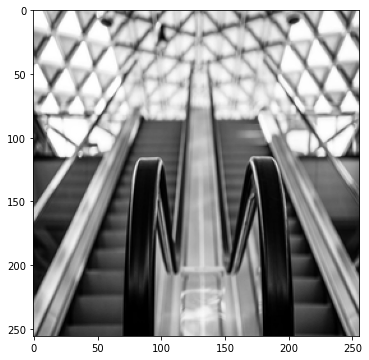

In [44]:
# opening an image
img = Image.open('img_elevator.jpg')
img = grayScale_image(img)
img = resizeImg(img,256, 256)
plot_image(img=img)

In [79]:
# filters to use #

## Laplacian 
sharpen = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

## Gaussian
GaussianSmoothing = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

In [80]:
# helper function to fetch the size after the convolution
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    for i in range(img_size):
        added = i + kernel_size
        if added <= img_size:
            # Increment if so
            num_pixels += 1
            
    return num_pixels
print("the size after convoloution is:")
calculate_target_size(img_size=256,kernel_size=3)

the size after convoloution is:


254

In [84]:
## function to make the convoloution ## 

def my_imfilter(img: np.array, kernel: np.array) -> np.array:
    # getting the size after 
    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0])
    
    k = kernel.shape[0]
    
    #new image
    convImg = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            convImg[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convImg

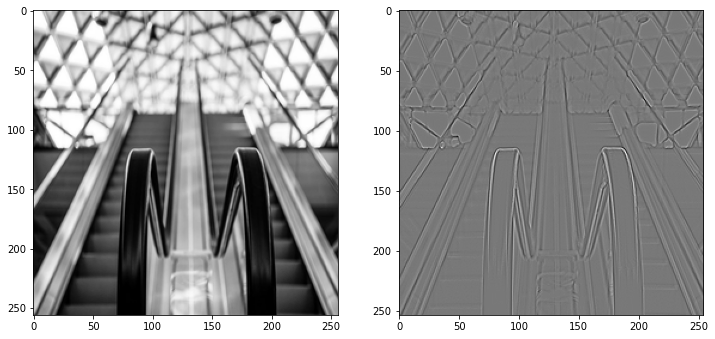

In [85]:
# without padding including negative pixeles !
''' Can be deleted if not relevant'''

img_sharpened = my_imfilter(img=np.array(img), kernel=sharpen)
plot_two_images(img,img_sharpened)

In [86]:
# Helper fucntion to place zeros instead negative pixels
def negative_to_zero(img: np.array) -> np.array:
    img = img.copy()
    img[img < 0] = 0
    return img

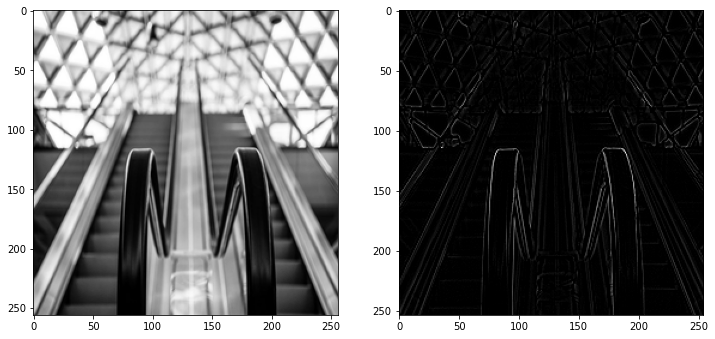

In [87]:
imgSharpenedWithOutNegatives = negative_to_zero(img_sharpened) # placing zero instead negative pixels 
plot_two_images(img,imgSharpenedWithOutNegatives) # plot origian image and img Sharpened Without Negatives

In [88]:
## function to return the number of padding we need to add to the image

def get_padding_width_per_side(kernel_size: int) -> int:
    return kernel_size // 2

pad_3x3 = get_padding_width_per_side(3)
print("the size of the padding that needs to be applied is:",pad_3x3)

the size of the padding that needs to be applied is: 1


In [89]:
## adding padding to the image - to all sides

def add_padding_to_image(img: np.array, padding_width: int) -> np.array:
    # Array of zeros of shape (img + padding_width)
    img_with_padding = np.zeros(shape=(
        img.shape[0] + padding_width * 2,
        img.shape[1] + padding_width * 2
    ))
    img_with_padding[padding_width:-padding_width, padding_width:-padding_width] = img    
    return img_with_padding

# calling to add_padding_to_image 
img_with_padding_3x3 = add_padding_to_image(img=np.array(img), padding_width=pad_3x3)

print(f'img with padding\n',img_with_padding_3x3)
print()
print(f'img without padding\n',np.array(img))

img with padding
 [[  0.   0.   0. ...   0.   0.   0.]
 [  0. 253. 254. ... 244. 247.   0.]
 [  0. 254. 254. ... 247. 249.   0.]
 ...
 [  0. 178. 127. ... 163. 162.   0.]
 [  0. 164.  84. ... 166. 165.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]

img without padding
 [[253 254 254 ... 184 244 247]
 [254 254 254 ... 216 247 249]
 [254 254 254 ... 239 246 251]
 ...
 [186 167 106 ... 165 162 161]
 [178 127  60 ... 173 163 162]
 [164  84  39 ... 179 166 165]]


(256, 256)


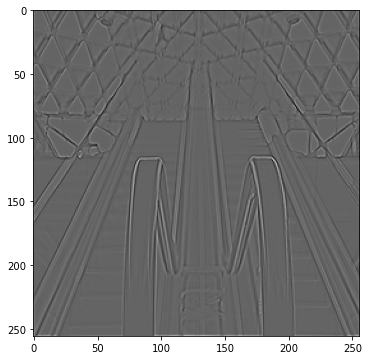

In [90]:
# printing the sharpened image after padding.
img_with_padding_3x3_shrpened  = my_imfilter(img=np.array(img_with_padding_3x3), kernel=sharpen)
print(img_with_padding_3x3_shrpened.shape) # print image size after convoultion
plot_image(img_with_padding_3x3_shrpened)

array([[142.625 , 190.375 , 190.5   , ..., 143.5625, 174.8125, 138.8125],
       [190.375 , 253.9375, 254.    , ..., 203.875 , 238.6875, 186.    ],
       [190.5   , 254.    , 254.    , ..., 221.1875, 244.75  , 187.0625],
       ...,
       [132.625 , 153.3125, 103.0625, ..., 167.6875, 162.8125, 121.    ],
       [119.8125, 123.8125,  76.875 , ..., 170.4375, 165.5   , 122.125 ],
       [ 81.6875,  77.125 ,  47.5625, ..., 128.875 , 125.8125,  92.4375]])

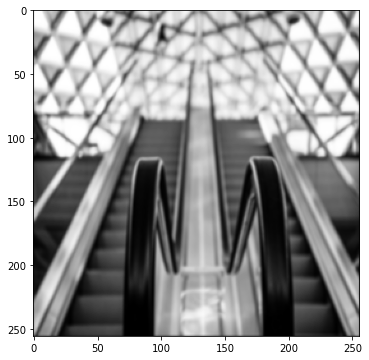

In [91]:
# printing the GaussianSmoothing image after padding.
GaussianImage = my_imfilter(img=np.array(img_with_padding_3x3),kernel=GaussianSmoothing)
plot_image(GaussianImage)
np.array(GaussianImage)

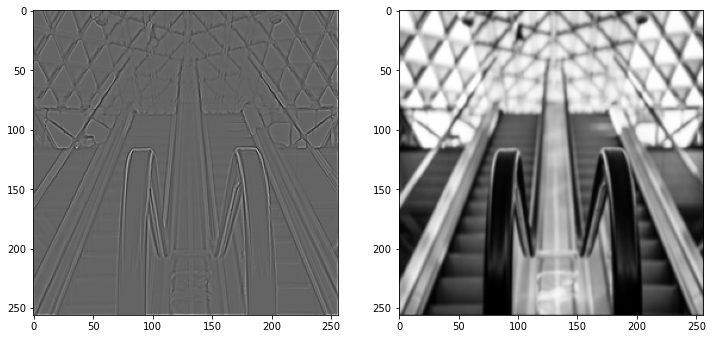

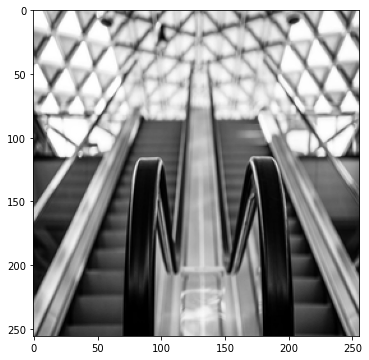

In [92]:
# Plot sharpened image, GaussianImage and original image

plot_two_images(img_with_padding_3x3_shrpened,GaussianImage)
plot_image(img)

size of the image: (256,256)
diff [[111  64  63 ...  51  40  90]
 [ 64   1   0 ... 251 235  44]
 [ 64   0   0 ... 239 234  47]
 ...
 [ 14 238  19 ... 250   1  42]
 [ 18   3  39 ... 246 254  42]
 [ 49  44  64 ...  31  39  73]]

GaussianImage
 [[142 190 190 ... 143 174 138]
 [190 253 254 ... 203 238 186]
 [190 254 254 ... 221 244 187]
 ...
 [132 153 103 ... 167 162 121]
 [119 123  76 ... 170 165 122]
 [ 81  77  47 ... 128 125  92]]
imageLibGaussian
 [[253 254 253 ... 194 214 228]
 [254 254 254 ... 198 217 230]
 [254 254 254 ... 204 222 234]
 ...
 [146 135 122 ... 161 163 163]
 [137 126 115 ... 160 163 164]
 [130 121 111 ... 159 164 165]]

max diff = 255
max diff index = 74


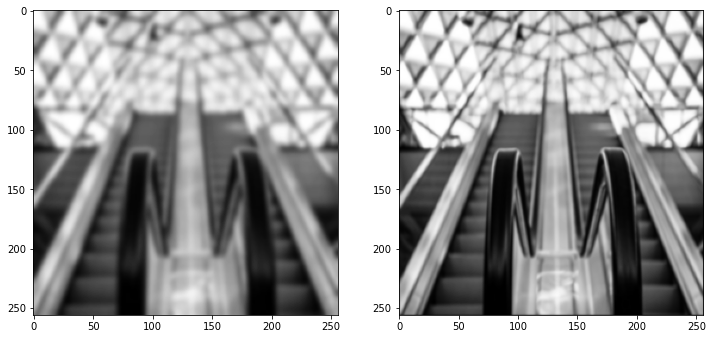

In [93]:
## Lib GaussianBlur function to check how is it compared to assignment function
from PIL import Image, ImageFilter
imageLibGaussian = Image.open(r"img_elevator.jpg")
imageLibGaussian = grayScale_image(imageLibGaussian)
imageLibGaussian = resizeImg(imageLibGaussian,256, 256)
imageLibGaussian = imageLibGaussian.filter(ImageFilter.GaussianBlur)

plot_two_images(imageLibGaussian,GaussianImage) # compare with fucntion I built and the lib function
diffPixels = np.subtract(np.array(imageLibGaussian),np.array(np.uint8(GaussianImage)))
print("diff",diffPixels)
print()
print("GaussianImage\n",np.array(np.uint8(GaussianImage)))
print
print("imageLibGaussian\n",np.array(imageLibGaussian))
print()
print(f'max diff = {diffPixels.max()}')
print(f'max diff index = {diffPixels.argmax()}')



## Begin part 1 of the assignment
In this section I've created a function called my_compose() it takes 2 picture np arrays and m (num of pixels).<br>
The objective of the function is to produce combined image that MSB (Most significant bit) of the first image, and 8-m bit of the second image.<br>
In a addtion I've created a function which detects if an image was forged. 

size of the image: (256,256)
size of the image: (256,256)


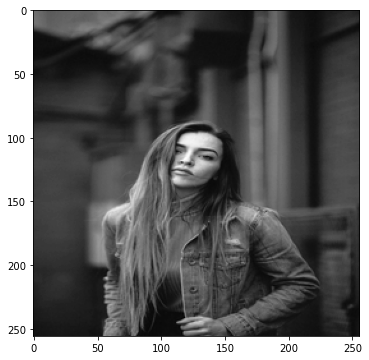

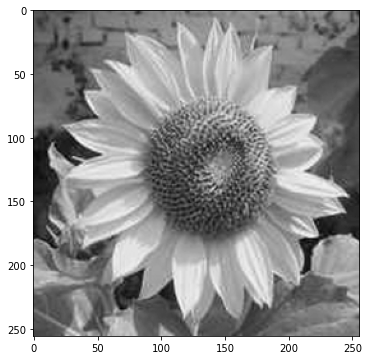

In [137]:
# opening the 2 images
img_1 = Image.open('img_girl.jpg')
img_1 = grayScale_image(img_1)
img_1 = resizeImg(img_1,256, 256)
plot_image(img=img_1)
img_1.save("img1_resized_and_grayed.jpg")
####################################
img_2 = Image.open('sunflower.jpg')
img_2 = grayScale_image(img_2)
img_2 = resizeImg(img_2,256, 256)
plot_image(img=img_2)
img_2.save("img2_resized_and_grayed.jpg")

In [138]:
## Utility functions to to cast int to bin 
def convertNumTobin(num:int)-> bin:
    #this will print a in binary
    bnr = bin(num).replace('0b','')
    x = bnr[::-1] #this reverses an array
    while len(x) < 8:
        x += '0'
    bnr = x[::-1]
    return bnr
## Utility functions to cast bin to int
def cast_bin_to_num(bnr:str)->int:
    return int(bnr,2)

In [139]:
def my_compose(s1: np.array ,s2: np.array, m: int = 3 )->np.array:
    
    if not(s1.size == s2.size): # if sizes are diffrent return
        return -1
    s3 = np.zeros(shape=(256, 256)) # new image 

    for i in range(len(s1)):
        for j in range(len(s2[0])):
            bnr1 = convertNumTobin(s1[i][j]) # convert to pixel to binary
            bnr2 = convertNumTobin(s2[i][j]) # convert to pixel to binary
            bnr1 = bnr1[:m] # get m bits 
            bnr2 = bnr2[-(8-m):] # get 8-m bits (msb)
            concatBnr = bnr1 + bnr2 # concat the 2 binary numbers
            s3[i][j] = cast_bin_to_num(concatBnr) # cast and assign to the new image
    return s3

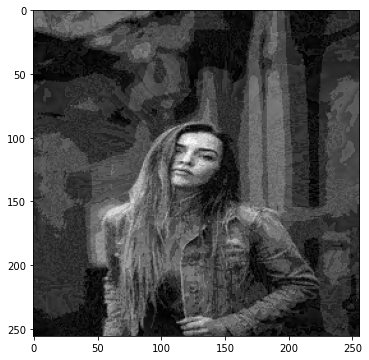

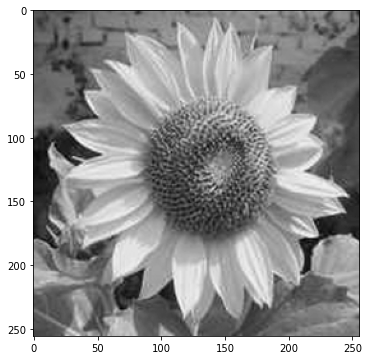

In [181]:
arr1 = np.array(img_1)
arr2 = np.array(img_2)
combinedImg = my_compose(arr1,arr2,m=3)
plot_image(combinedImg)
combinedImg = Image.fromarray(combinedImg.astype('uint8'))
combinedImg.save("combinded_image.jpg")
plot_image(tempPic)
#plt.imshow(combinedImg)

In [182]:
def image_forgery(arr1, arr2):
    if not(arr1.size == arr1.size): # if sizes are diffrent return
        print("The image is fake!")
        return False
    
    for i in range(len(arr1)):
        for j in range(len(arr2[0])):
            if arr1[i][j] != arr2[i][j]:
                print("The image is fake!")
                return False
    print("The image is identical!")
    return True
            

In [183]:
sunflowerImage = Image.open('img2_resized_and_grayed.jpg')
sunflowerArr = np.array(sunflowerImage)

combined_image = Image.open('combinded_image.jpg')
combined_imageArr = np.array(combined_image)
image_forgery(sunflowerArr,combined_imageArr)

    

The image is fake!


False

In [144]:
def Image_forgery_detection_1():
    
    original_1 = cv2.imread("sunflower.jpg")
    original_1 = cv2.cvtColor(original_1, cv2.COLOR_BGR2GRAY)
    original_1 = cv2.resize(original_1, (256, 256)) 
#     original_2 = cv2.imread("tikia\kaka_1.jpeg")
#     original_2 = cv2.cvtColor(original_2, cv2.COLOR_BGR2GRAY)
    new_image = cv2.imread("combinded_image.jpg")
    new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    new_image = cv2.resize(new_image, (256, 256)) 

    def find_difference_in_photos(imageA, imageB, title):
        M = mse(imageA, imageB)
        S = ssim(imageA, imageB)        
        result=M+S
        return result
        
    def mse(imageA, imageB):
        
        deviat = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
        deviat /= float(imageA.shape[0] * imageA.shape[1])
        return deviat  
    
#     find_difference_in_photos(original, original, "Original vs. Original")
    result_1=find_difference_in_photos(original_1, new_image, "Original_no_1 vs. new_image")
#     result_2=find_difference_in_photos(original_2, new_image, "Original_no_2 vs. new_image")
    if (result_1!=1):
        return ("The new image is fake!")
    return ("The new image is same")

In [ ]:
Image_forgery_detection_1()